# Mini Project 1

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

**Instructions** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

-- You are to interpret and explain your interpretation of a high risk profile and low risk profile of a portfolio. You should provide some measurable quantitative data in your explanation.

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

The most natural thing I could think of, when I was completing this, was to determine stock indices which individually had a low/high volatility. I then applied a threshold of 0.3 standard deviation to "define" low/high volatility, which I then grouped together, and used different approaches to determining appropriate weights for low and high volatility investment portfolios. These seemed to work.

In [317]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

### 0.1 Do Basic set up for later tasks

Set different stock indices for now, for what we will use for high and what for low risk portofolios.

First step is to simply fetch the data. I am considering the closing times for this.

One thing to note, is that stocks with higher variance are of higher volatility, so we can put a threshold in order to define "high/low volatility".

In [318]:
years = 2
fetch_period = f"{years}y"

In [319]:
stock_indices = ['TSLA','NVDA','AMD','PLTR','ZM','SPCE','COIN','RIVN','LCID','ARKK',
                 'JNJ','PG','KO','MCD','WMT','PEP','DUK','NEE','TGT','VZ']

data_close = yf.download(stock_indices, period = fetch_period)['Close']

[*********************100%***********************]  20 of 20 completed


In [320]:
stock_indices_1 = ['TSLA', 'AMD', 'NVDA', 'PLTR', 'ZM']
#stock_indices_2 = ['TSLA', 'AMD', 'NVDA', 'PLTR', 'ZM']
stock_indices_2 = ['JNJ', 'PG', 'KO', 'MCD', 'WMT']

data_close_1 = yf.download(stock_indices_1, period = fetch_period)['Close']
data_close_2 = yf.download(stock_indices_2, period = fetch_period)['Close']


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


The daily percentage returns can be computed through 'pct_change', and dropna is used to drop the the first entry, which is NaN.

Example of computations:
- (data_high['AMD'][1]-data_high['AMD'][0])/data_high['AMD'][0]
- (data_high['AMD'][2]-data_high['AMD'][1])/data_high['AMD'][1]

In [321]:
returns_pct = data_close.pct_change().dropna()     # computes daily percentage return: (P_t-P_{t-1})/P_{t-1}
returns_pct_1 = data_close_1.pct_change().dropna()
returns_pct_2 = data_close_2.pct_change().dropna()

cov_matrix = returns_pct_1.cov()

In [322]:
weights_equal = np.array([1/len(stock_indices)] * len(stock_indices))  #assigning equal weight to each stock
weights_equal_1 = np.array([1/len(stock_indices_1)] * len(stock_indices_1))
weights_equal_2 = np.array([1/len(stock_indices_2)] * len(stock_indices_2))

# Portfolio daily returns
portfolio_returns = returns_pct.dot(weights_equal)
portfolio_returns_1 = returns_pct_1.dot(weights_equal_1)
portfolio_returns_2 = returns_pct_2.dot(weights_equal_2)

# Annualize Mean and Std Dev (252 trading days per year)
mean_return = np.mean(portfolio_returns) * (252*years)
volatility = np.std(portfolio_returns) * np.sqrt(252*years)

mean_return_1 = np.mean(portfolio_returns_1) * (252*years)
volatility_1 = np.std(portfolio_returns_1) * np.sqrt(252*years)

mean_return_2 = np.mean(portfolio_returns_2) * (252*years)
volatility_2 = np.std(portfolio_returns_2) * np.sqrt(252*years)

print(f"Risk Portfolio with 20 indices - Annual Return: {mean_return:.2%}, Volatility: {volatility:.2%}")
print(f"Risk Portfolio with 5 handpicked high volatility indices - Annual Return: {mean_return_1:.2%}, Volatility: {volatility_1:.2%}")
print(f"Risk Portfolio with 5 handpicked low volatility indices - Annual Return: {mean_return_2:.2%}, Volatility: {volatility_2:.2%}")


Risk Portfolio with 20 indices - Annual Return: 41.62%, Volatility: 32.13%
Risk Portfolio with 5 handpicked high volatility indices - Annual Return: 117.36%, Volatility: 54.78%
Risk Portfolio with 5 handpicked low volatility indices - Annual Return: 23.95%, Volatility: 17.24%


### 0.2 Apply a threshold on the standard deviation

I selected a threshold for annualized_volatility of std > 30% to be considered high

Note that annualized (and not daily) volatility is also directly comparable to the expected annual return in ratios (e.g. Sharpe ratio)

In [323]:
daily_volatility = returns_pct.std()
annualized_volatility = daily_volatility * (252 ** 0.5)

In [324]:
# split based on threshold
threshold = 0.3

stock_indices_high_vol = annualized_volatility[annualized_volatility > threshold].index.tolist()
stock_indices_low_vol = annualized_volatility[annualized_volatility <= threshold].index.tolist()

print(f"High Volatility Stocks, total of {len(stock_indices_high_vol)} (> 30% annualized):")
print(stock_indices_high_vol)

print(f"\nLow Volatility Stocks, total of {len(stock_indices_low_vol)} (<= 30% annualized):")
print(stock_indices_low_vol)

High Volatility Stocks, total of 11 (> 30% annualized):
['AMD', 'ARKK', 'COIN', 'LCID', 'NVDA', 'PLTR', 'RIVN', 'SPCE', 'TGT', 'TSLA', 'ZM']

Low Volatility Stocks, total of 9 (<= 30% annualized):
['DUK', 'JNJ', 'KO', 'MCD', 'NEE', 'PEP', 'PG', 'VZ', 'WMT']


In [325]:
data_close_high = yf.download(stock_indices_high_vol, period = fetch_period)['Close']
data_close_low = yf.download(stock_indices_low_vol, period = fetch_period)['Close']

returns_pct_high = data_close_high.pct_change().dropna()  # computes daily percentage return: (P_t-P_{t-1})/P_{t-1}
returns_pct_low = data_close_low.pct_change().dropna()

[*********************100%***********************]  11 of 11 completed
[*********************100%***********************]  9 of 9 completed


In [326]:
weights_equal_high = np.array([1/len(stock_indices_high_vol)] * len(stock_indices_high_vol))
weights_equal_low = np.array([1/len(stock_indices_low_vol)] * len(stock_indices_low_vol))

portfolio_returns_high = returns_pct_high.dot(weights_equal_high)
portfolio_returns_low = returns_pct_low.dot(weights_equal_low)

# - - - - - - - - - - - - - - - - - - - - - - - - - - - -

mean_return_high = np.mean(portfolio_returns_high) * (252*years)
volatility_high = np.std(portfolio_returns_high) * np.sqrt(252*years)

mean_return_low = np.mean(portfolio_returns_low) * (252*years)
volatility_low = np.std(portfolio_returns_low) * np.sqrt(252*years)

print(f"Risk Portfolio with {len(stock_indices_high_vol)} thresholded high volatility indices - Annual Return: {mean_return_high:.2%}, Volatility: {volatility_high:.2%}")
print(f"Risk Portfolio with {len(stock_indices_low_vol)} thresholded low volatility indices - Annual Return: {mean_return_low:.2%}, Volatility: {volatility_low:.2%}")


Risk Portfolio with 11 thresholded high volatility indices - Annual Return: 59.49%, Volatility: 55.39%
Risk Portfolio with 9 thresholded low volatility indices - Annual Return: 19.79%, Volatility: 18.18%


### 0.3 Solve a quadratic program, similar to what was done in lecture 2

Note that we can adjust the min/max investment of capital per single index, to modify the volatility

Note that that depending on the number of stocks considered $n$, the min investement needs to be $<1/n$

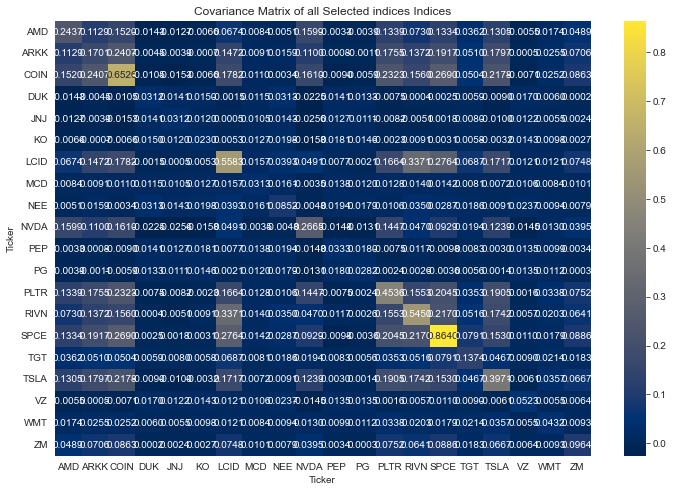

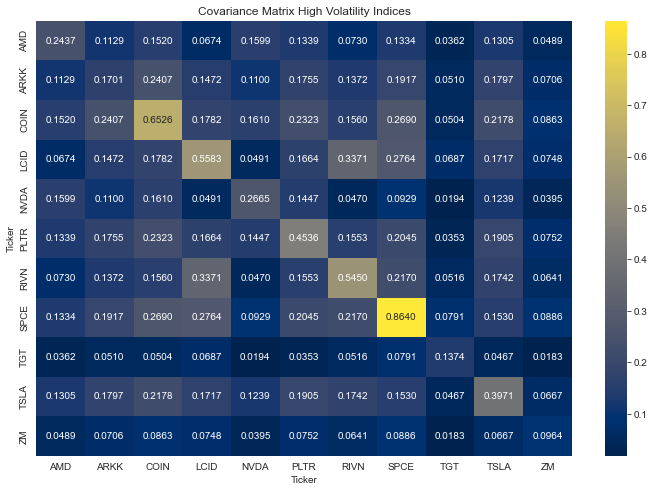

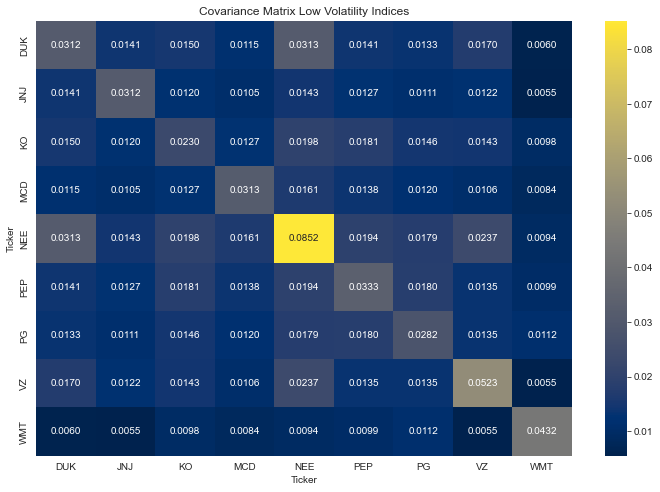

In [327]:
# Covariance matrices

daily_returns_all = np.log(data_close/data_close.shift(1))
daily_returns_all = daily_returns_all.dropna()
covariance_matrix_all = 252 * daily_returns_all.cov()

plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_all, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix of all Selected indices Indices')
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - -

daily_returns_high = np.log(data_close_high/data_close_high.shift(1))
daily_returns_high = daily_returns_high.dropna()
covariance_matrix_high = 252*((daily_returns_high).cov())

plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_high, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix High Volatility Indices')
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - -

daily_returns_low = np.log(data_close_low/data_close_low.shift(1))
daily_returns_low = daily_returns_low.dropna()
covariance_matrix_low = 252*((daily_returns_low).cov())

plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_low, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix Low Volatility Indices')
plt.show()

### High Volatility Stocks

In [328]:
#1) Must invest at least 5% of capital into each index
#2) Cannot invest more than 30% of capital into a single index

n_assets_high = len(stock_indices_high_vol)

max_invest = 0.3
min_invest = 0.05   # make sure that min_invest < 1/n_assets_high
min_invest = (1/n_assets_high)/2
min_invest = 0.01

#Create dictionary average/expected daily return for indexes in stock_symbols normalized for yearly return
#expected_returns = {stock: 252*np.mean(returns[stock]) for stock in stock_symbols}

initial_weights_high = np.array([1/n_assets_high] * n_assets_high)

# Bounds for each asset (min 5%, max 30%)
bounds = tuple((min_invest, max_invest) for _ in range(n_assets_high))

# Constraint: weights must sum to 1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)

# Objective: portfolio volatility
def portfolio_volatility(weights, covariance_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

# Run optimization
result_high = minimize(
    portfolio_volatility,
    initial_weights_high,
    args=(covariance_matrix_high,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract optimal weights
optimal_weights_high = result_high.x

# Print results
print("Optimal Asset Weights to minimize volatility for indices with high volatility:")
for ticker, weight in zip(stock_indices_high_vol, optimal_weights_high):
    print(f"{ticker}: Weight = {weight:.4f}")

print()
print(f' The optimal volatility subject to the constraints is {result_high.fun}')


Optimal Asset Weights to minimize volatility for indices with high volatility:
AMD: Weight = 0.0917
ARKK: Weight = 0.0574
COIN: Weight = 0.0100
LCID: Weight = 0.0100
NVDA: Weight = 0.1608
PLTR: Weight = 0.0100
RIVN: Weight = 0.0400
SPCE: Weight = 0.0100
TGT: Weight = 0.3000
TSLA: Weight = 0.0100
ZM: Weight = 0.3000

 The optimal volatility subject to the constraints is 0.26715540592703796


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:439: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_slsqp_py.py:493: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])


#### Do the same, but now **maximize** the objective

In [329]:
def negative_portfolio_volatility(weights, covariance_matrix):
    # minimize negative volatility == maximize volatility
    return -np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

result_high_max = minimize(
    negative_portfolio_volatility,
    initial_weights_high,
    args=(covariance_matrix_high,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Extract optimal weights
optimal_weights_high_max = result_high_max.x

# Print results
print("Optimal Asset Weights to MAXIMIZE volatility for indices with high volatility:")
for ticker, weight in zip(stock_indices_high_vol, optimal_weights_high_max):
    print(f"{ticker}: Weight = {weight:.4f}")

print()
print(f' The optimal volatility subject to the constraints is {result_high_max.fun}')

Optimal Asset Weights to MAXIMIZE volatility for indices with high volatility:
AMD: Weight = 0.0100
ARKK: Weight = 0.0100
COIN: Weight = 0.3000
LCID: Weight = 0.3000
NVDA: Weight = 0.0100
PLTR: Weight = 0.0100
RIVN: Weight = 0.0300
SPCE: Weight = 0.3000
TGT: Weight = 0.0100
TSLA: Weight = 0.0100
ZM: Weight = 0.0100

 The optimal volatility subject to the constraints is -0.59010394113491


### Low Volatility Stocks

In [330]:
#1) Must invest at least 5% of capital into each index
#2) Cannot invest more than 30% of capital into a single index

n_assets_low = len(stock_indices_low_vol)

max_invest = 0.3
min_invest = 0.05   # make sure that min_invest < 1/n_assets_low
min_invest = (1/n_assets_low)/2
min_invest = 0.01

initial_weights_low = np.array([1/n_assets_low] * n_assets_low)
bounds_low = tuple((min_invest, max_invest) for _ in range(n_assets_low))

constraints_low = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1},)

def portfolio_volatility(weights, covariance_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))

result_low = minimize(
    portfolio_volatility,
    initial_weights_low,
    args=(covariance_matrix_low,),
    method='SLSQP',
    bounds=bounds_low,
    constraints=constraints_low
)

# Extract optimal weights
optimal_weights_low = result_low.x

# Print results
print("Optimal Asset Weights to minimize volatility for indices with low volatility:")
for ticker, weight in zip(stock_indices_low_vol, optimal_weights_low):
    print(f"{ticker}: Weight = {weight:.4f}")

print()
print(f"The optimal volatility subject to the constraints is {result_low.fun:.4f}")


Optimal Asset Weights to minimize volatility for indices with low volatility:
DUK: Weight = 0.1036
JNJ: Weight = 0.1878
KO: Weight = 0.1543
MCD: Weight = 0.1677
NEE: Weight = 0.0100
PEP: Weight = 0.0120
PG: Weight = 0.1185
VZ: Weight = 0.0637
WMT: Weight = 0.1824

The optimal volatility subject to the constraints is 0.1199


The above approach resembles the Mean-Variance Optimization strategy of **Markowitz’s Efficient Frontier** to pick optimal weights based on:

- Expected returns
- Covariance matrix of returns

Below, I also include this scenario when we consider all tickers before the thresholding was applied.

In [331]:
def portfolio_volatility(weights, covariance_matrix_all):
    return np.sqrt(weights.T @ covariance_matrix_all @ weights)

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = [(0, 1)] * len(stock_indices)

initial_weights_all = np.array([1/len(stock_indices)] * len(stock_indices))

# minimize volatility
result_all = minimize(portfolio_volatility,
                      initial_weights_all,
                      args=(covariance_matrix_all,),
                      bounds = bounds,
                      constraints = constraints)

# Extract optimal weights
optimal_weighs_all = result_all.x

# Print results
print("Optimal Asset Weights to minimize volatility when considering all indices:")
for ticker, weight in zip(stock_indices, optimal_weighs_all):
    print(f"{ticker}: Weight = {weight:.4f}")

print()
print(f"The optimal volatility subject to no volatility constraints is {result_all.fun:.4f}")

Optimal Asset Weights to minimize volatility when considering all indices:
TSLA: Weight = 0.0000
NVDA: Weight = 0.0000
AMD: Weight = 0.0000
PLTR: Weight = 0.1310
ZM: Weight = 0.2006
SPCE: Weight = 0.1633
COIN: Weight = 0.0000
RIVN: Weight = 0.0893
LCID: Weight = 0.0000
ARKK: Weight = 0.0804
JNJ: Weight = 0.0082
PG: Weight = 0.1260
KO: Weight = 0.0000
MCD: Weight = 0.0000
WMT: Weight = 0.0000
PEP: Weight = 0.0145
DUK: Weight = 0.0000
NEE: Weight = 0.0410
TGT: Weight = 0.0907
VZ: Weight = 0.0549

The optimal volatility subject to no volatility constraints is 0.1082


In [332]:
portfolio_returns_MV_opt = returns_pct.dot(optimal_weighs_all)

mean_return_MV_opt = np.mean(portfolio_returns_MV_opt) * (252*years)
volatility_MV_opt = np.std(portfolio_returns_MV_opt) * np.sqrt(252*years)

print(f"Risk Portfolio with ``Mean-Variance Optimization'' - Annual Return: {mean_return_MV_opt:.2%}, Volatility: {volatility_MV_opt:.2%}")

Risk Portfolio with ``Mean-Variance Optimization'' - Annual Return: 33.07%, Volatility: 15.32%


### 1. Volatility-Adjusted Weights  --  We can adjust the weights s.t. we have weights which are inversely proportional to the volatility

By normalizng with the standard deviation of the respective stock, this scheme allocates more capital to less volatile assets and less capital to more volatile assets.

Observation -- Even though the weights here ended up being close to the average weighing scheme, the annual return and volatility was significantly higher

### All stock indices

In [333]:
inv_volatility = 1 / returns_pct.std()
weights_inv_vol = inv_volatility / inv_volatility.sum()

portfolio_returns_inv_vol = returns_pct.dot(weights_inv_vol)

mean_return_inv_vol = np.mean(portfolio_returns_inv_vol) * (252*years)
volatility_inv_vol = np.std(portfolio_returns_inv_vol) * np.sqrt(252*years)

print(f"Risk Portfolio with ``Inverse Volatility Weighting'' - Annual Return: {mean_return_inv_vol:.2%}, Volatility: {volatility_inv_vol:.2%}")

Risk Portfolio with ``Inverse Volatility Weighting'' - Annual Return: 30.92%, Volatility: 19.82%


In [334]:
print(weights_inv_vol)

Ticker
AMD     0.029582
ARKK    0.035525
COIN    0.017782
DUK     0.083324
JNJ     0.083532
KO      0.096996
LCID    0.019529
MCD     0.083307
NEE     0.050745
NVDA    0.028439
PEP     0.080925
PG      0.087982
PLTR    0.021240
RIVN    0.020019
SPCE    0.015478
TGT     0.040167
TSLA    0.023120
VZ      0.064391
WMT     0.070702
ZM      0.047217
dtype: float64


### Check Profits from this portofolio

#### Cumulative return

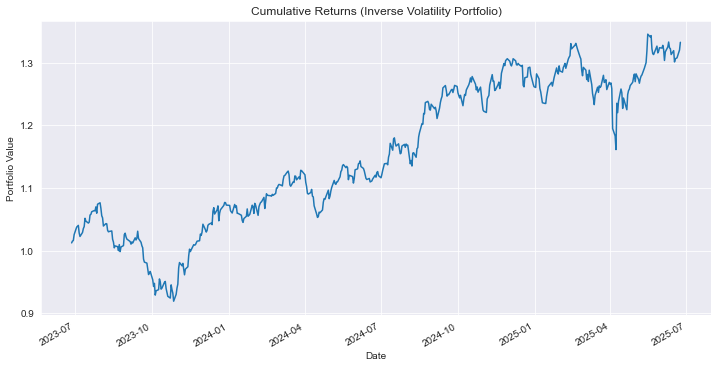

Total return over 2 years: 33.28%


In [335]:
# Cumulative return of the portfolio
cumulative_returns = (1 + portfolio_returns_inv_vol).cumprod()

import matplotlib.pyplot as plt
cumulative_returns.plot(figsize=(12, 6), title='Cumulative Returns (Inverse Volatility Portfolio)')
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

final_return = cumulative_returns.iloc[-1] - 1
print(f"Total return over {years} years: {final_return:.2%}")

#### For a specified investment amount

In [336]:
initial_investment = 10000
portfolio_value = initial_investment * (1 + portfolio_returns_inv_vol).cumprod()

# Final value
final_value = portfolio_value.iloc[-1]
profit = final_value - initial_investment

print(f"Final Portfolio Value: ${final_value:,.2f}")
print(f"Total Profit: ${profit:,.2f}")

Final Portfolio Value: $13,327.80
Total Profit: $3,327.80


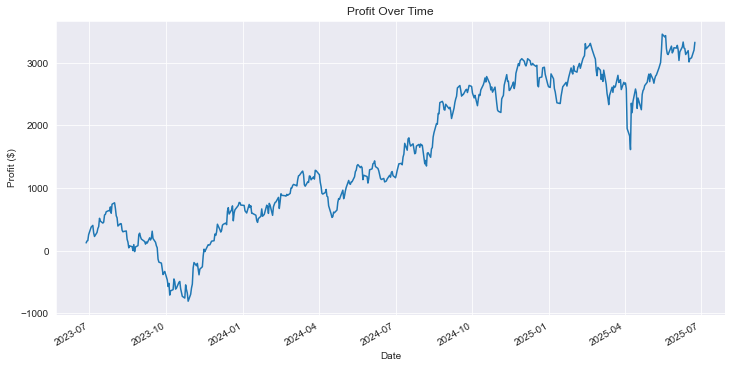

In [337]:
# Visualize profit/loss at each time point
profits_over_time = initial_investment * (1 + portfolio_returns_inv_vol).cumprod() - initial_investment
profits_over_time.plot(figsize=(12, 6), title='Profit Over Time')
plt.ylabel("Profit ($)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

### High Volatility stock indices

In [338]:
inv_volatility_high = 1 / returns_pct_high.std()
weights_inv_vol_high = inv_volatility_high / inv_volatility_high.sum()

portfolio_returns_inv_vol_high = returns_pct_high.dot(weights_inv_vol_high)

mean_return_inv_vol_high = np.mean(portfolio_returns_inv_vol_high) * (252*years)
volatility_inv_vol_high = np.std(portfolio_returns_inv_vol_high) * np.sqrt(252*years)

print(f"Risk Portfolio with ``Inverse Volatility Weighting'' for High volatility indices - Annual Return: {mean_return_inv_vol_high:.2%}, Volatility: {volatility_inv_vol_high:.2%}")

Risk Portfolio with ``Inverse Volatility Weighting'' for High volatility indices - Annual Return: 58.95%, Volatility: 48.97%


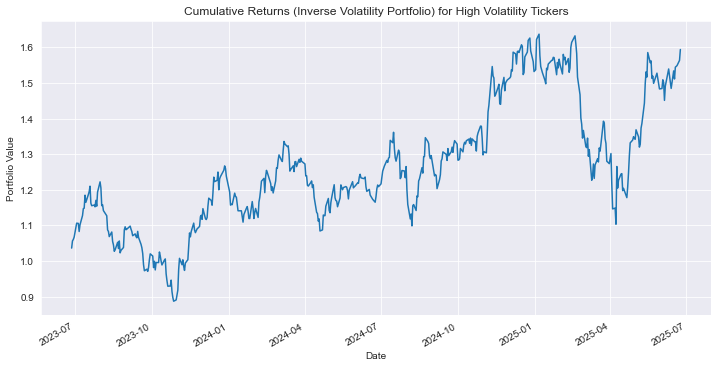

Total return over 2 years: 59.42%


In [339]:
# Cumulative return of the portfolio
cumulative_returns_high_vol = (1 + portfolio_returns_inv_vol_high).cumprod()

import matplotlib.pyplot as plt
cumulative_returns_high_vol.plot(figsize=(12, 6), title='Cumulative Returns (Inverse Volatility Portfolio) for High Volatility Tickers')
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

final_return_high_vol = cumulative_returns_high_vol.iloc[-1] - 1
print(f"Total return over {years} years: {final_return_high_vol:.2%}")

### Low Volatility stock indices

In [340]:
inv_volatility_low = 1 / returns_pct_low.std()
weights_inv_vol_low = inv_volatility_low / inv_volatility_low.sum()

portfolio_returns_inv_vol_low = returns_pct_low.dot(weights_inv_vol_low)

mean_return_inv_vol_low = np.mean(portfolio_returns_inv_vol_low) * (252*years)
volatility_inv_vol_low = np.std(portfolio_returns_inv_vol_low) * np.sqrt(252*years)

print(f"Risk Portfolio with ``Inverse Volatility Weighting'' for Low volatility indices - Annual Return: {mean_return_inv_vol_low:.2%}, Volatility: {volatility_inv_vol_low:.2%}")

Risk Portfolio with ``Inverse Volatility Weighting'' for Low volatility indices - Annual Return: 19.02%, Volatility: 17.76%


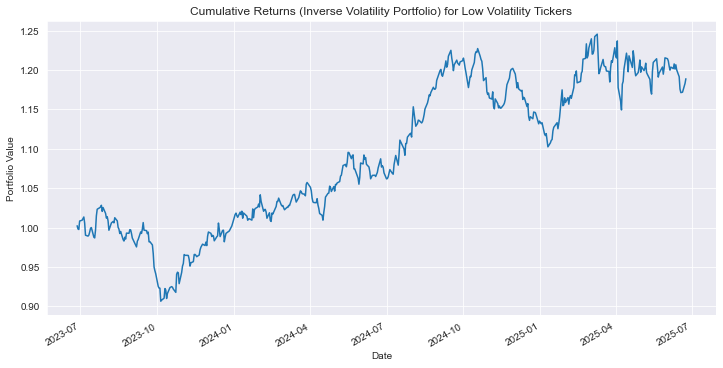

Total return over 2 years: 18.89%


In [341]:
# Cumulative return of the portfolio
cumulative_returns_low_vol = (1 + portfolio_returns_inv_vol_low).cumprod()

import matplotlib.pyplot as plt
cumulative_returns_low_vol.plot(figsize=(12, 6), title='Cumulative Returns (Inverse Volatility Portfolio) for Low Volatility Tickers')
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.grid(True)
plt.show()

final_return_low_vol = cumulative_returns_low_vol.iloc[-1] - 1
print(f"Total return over {years} years: {final_return_low_vol:.2%}")

## Visualize Std  --  Inverse Volatility Weights

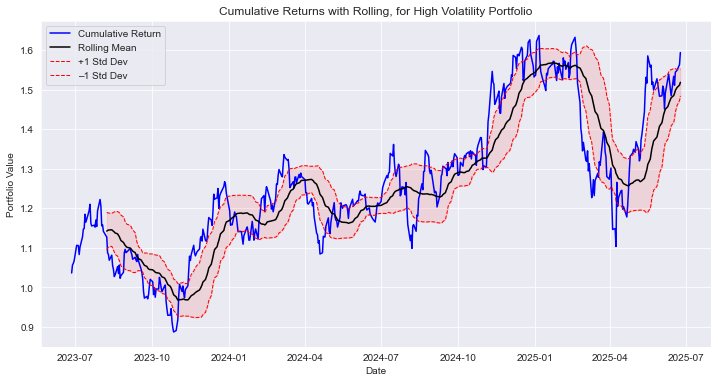

Total return over 2 years: 59.42%


In [342]:
# Cumulative returns of a portfolio over time, assuming daily compounding
cumulative_returns_high_vol = (1 + portfolio_returns_inv_vol_high).cumprod()

# Rolling statistics
rolling_window = 30  # 30 days of trading days
rolling_mean = cumulative_returns_high_vol.rolling(window=rolling_window).mean()
rolling_std = cumulative_returns_high_vol.rolling(window=rolling_window).std()

# Upper and lower bounds (+/- one standard deviation)
upper_band = rolling_mean + rolling_std
lower_band = rolling_mean - rolling_std

# - - - - - Plotting - - - - - 
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_high_vol, label='Cumulative Return', color='blue')

# Rolling mean
plt.plot(rolling_mean, label='Rolling Mean', color='black', linewidth=1.5)

# std deviation bands
plt.plot(upper_band, color='red', linestyle='--', linewidth=1, label='+1 Std Dev')
plt.plot(lower_band, color='red', linestyle='--', linewidth=1, label='–1 Std Dev')
plt.fill_between(cumulative_returns_high_vol.index, lower_band, upper_band, color='red', alpha=0.1)

plt.title('Cumulative Returns with Rolling, for High Volatility Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.show()

# Final return
final_return_high_vol = cumulative_returns_high_vol.iloc[-1] - 1
print(f"Total return over {years} years: {final_return_high_vol:.2%}")


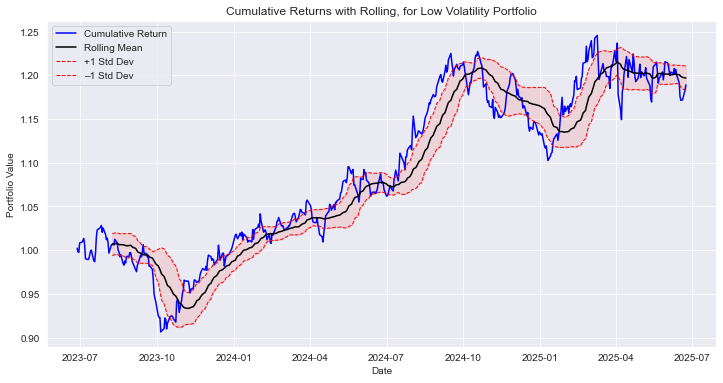

Total return over 2 years: 18.89%


In [343]:
# Cumulative returns of a portfolio over time, assuming daily compounding
cumulative_returns_low_vol = (1 + portfolio_returns_inv_vol_low).cumprod()

# Rolling statistics
rolling_window = 30  # 30 days of trading days
rolling_mean = cumulative_returns_low_vol.rolling(window=rolling_window).mean()
rolling_std = cumulative_returns_low_vol.rolling(window=rolling_window).std()

# Upper and lower bounds (+/- one standard deviation)
upper_band = rolling_mean + rolling_std
lower_band = rolling_mean - rolling_std

# - - - - - Plotting - - - - - 
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_low_vol, label='Cumulative Return', color='blue')

# Rolling mean
plt.plot(rolling_mean, label='Rolling Mean', color='black', linewidth=1.5)

# std deviation bands
plt.plot(upper_band, color='red', linestyle='--', linewidth=1, label='+1 Std Dev')
plt.plot(lower_band, color='red', linestyle='--', linewidth=1, label='–1 Std Dev')
plt.fill_between(cumulative_returns_low_vol.index, lower_band, upper_band, color='red', alpha=0.1)

plt.title('Cumulative Returns with Rolling, for Low Volatility Portfolio')
plt.ylabel("Portfolio Value")
plt.xlabel("Date")
plt.grid(True)
plt.legend()
plt.show()

# Final return
final_return_low_vol = cumulative_returns_low_vol.iloc[-1] - 1
print(f"Total return over {years} years: {final_return_low_vol:.2%}")


## 2. According to Sharpe Ratio

**Note**: We need to make an assumption on the value of the risk free rate, in order to properly define the Sharpe ratio

In [352]:
risk_free_rate = 0.02  # annual risk free rate  -->  this is an assumption I am making, in order to define the Sharpe ratio
risk_free_rate = 0.1

def optimize_sharpe_ratio(daily_returns, risk_free_rate = 0.02):
    mean_returns = daily_returns.mean() * 252
    cov_matrix = daily_returns.cov() * 252
    num_assets = len(mean_returns)

    def portfolio_return(weights):
        return np.dot(weights, mean_returns)

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    def negative_sharpe_ratio(weights):  # we will be minimizing
        ret = portfolio_return(weights)
        vol = portfolio_volatility(weights)
        return - (ret - risk_free_rate) / vol

    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    bounds = tuple((0, 1) for _ in range(num_assets))
    init_guess = np.array(num_assets * [1. / num_assets])

    opt_results = minimize(negative_sharpe_ratio, init_guess,
                           method='SLSQP',
                           bounds=bounds,
                           constraints=constraints)
    return opt_results.x, mean_returns, cov_matrix

In [353]:
# Optimize for volatility portfolios
weights_high, mean_ret_high, cov_high = optimize_sharpe_ratio(returns_pct_high, risk_free_rate)
weights_low, mean_ret_low, cov_low = optimize_sharpe_ratio(returns_pct_low, risk_free_rate)

# Weighted daily returns series for both portfolios
portfolio_returns_high = returns_pct_high.dot(weights_high)
portfolio_returns_low = returns_pct_low.dot(weights_low)

# Cumulative returns
cumulative_returns_high = (1 + portfolio_returns_high).cumprod()
cumulative_returns_low = (1 + portfolio_returns_low).cumprod()

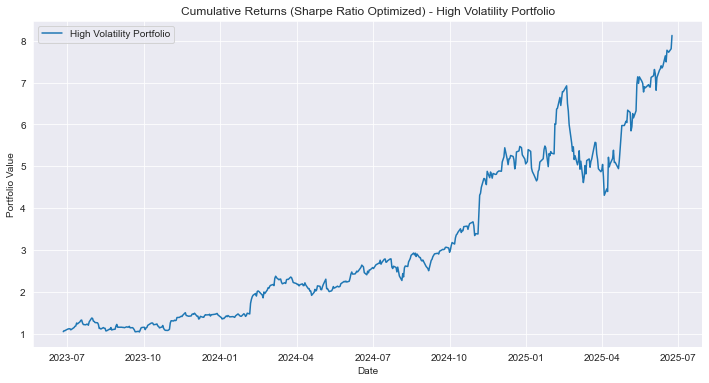

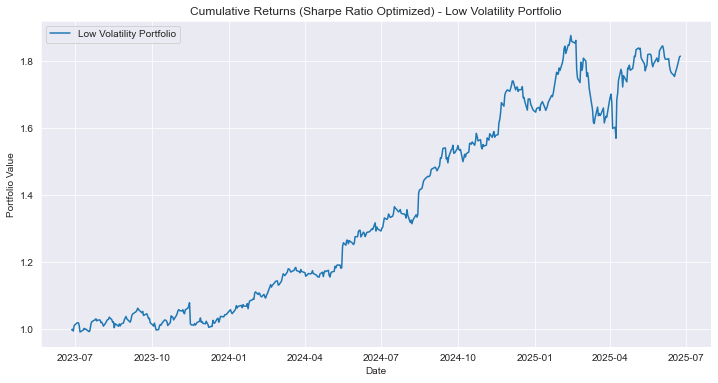

High Volatility Portfolio Total Return over 2 years: 712.25%
Low Volatility Portfolio Total Return over 2 years: 81.31%


In [354]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_high, label='High Volatility Portfolio')
plt.title('Cumulative Returns (Sharpe Ratio Optimized) - High Volatility Portfolio')
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_low, label='Low Volatility Portfolio')
plt.title('Cumulative Returns (Sharpe Ratio Optimized) - Low Volatility Portfolio')
plt.ylabel('Portfolio Value')
plt.xlabel('Date')
plt.grid(True)
plt.legend()
plt.show()

final_return_high = cumulative_returns_high.iloc[-1] - 1
final_return_low = cumulative_returns_low.iloc[-1] - 1

print(f"High Volatility Portfolio Total Return over {years} years: {final_return_high:.2%}")
print(f"Low Volatility Portfolio Total Return over {years} years: {final_return_low:.2%}")

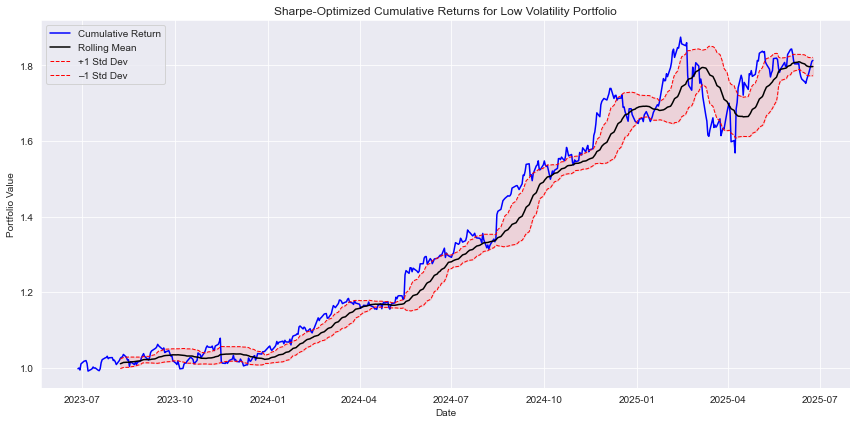

Total return over 2 years: 81.31%


In [359]:
cumulative_returns_sharpe_low = (1 + portfolio_returns_low).cumprod()

rolling_window = 30
rolling_mean = cumulative_returns_sharpe_low.rolling(window=rolling_window).mean()
rolling_std = cumulative_returns_sharpe_low.rolling(window=rolling_window).std()

upper_band = rolling_mean + rolling_std
lower_band = rolling_mean - rolling_std

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_sharpe_low, label='Cumulative Return', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='black', linewidth=1.5)
plt.plot(upper_band, linestyle='--', color='red', linewidth=1, label='+1 Std Dev')
plt.plot(lower_band, linestyle='--', color='red', linewidth=1, label='–1 Std Dev')
plt.fill_between(cumulative_returns_sharpe_low.index, lower_band, upper_band, color='red', alpha=0.1)

plt.title('Sharpe-Optimized Cumulative Returns for Low Volatility Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

final_return_sharpe_low = cumulative_returns_sharpe_low.iloc[-1] - 1
print(f"Total return over {years} years: {final_return_sharpe_low:.2%}")

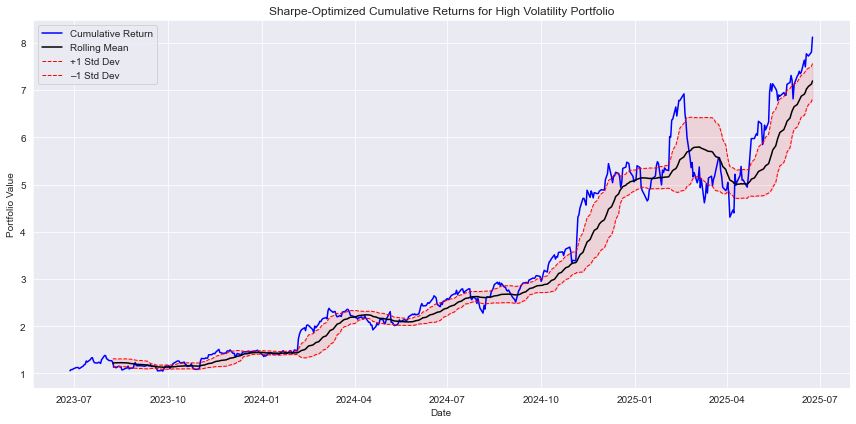

Total return over 2 years: 712.25%


In [357]:
cumulative_returns_sharpe_high = (1 + portfolio_returns_high).cumprod()

rolling_window = 30
rolling_mean_high = cumulative_returns_sharpe_high.rolling(window=rolling_window).mean()
rolling_std_high = cumulative_returns_sharpe_high.rolling(window=rolling_window).std()

upper_band_high = rolling_mean_high + rolling_std_high
lower_band_high = rolling_mean_high - rolling_std_high

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns_sharpe_high, label='Cumulative Return', color='blue')
plt.plot(rolling_mean_high, label='Rolling Mean', color='black', linewidth=1.5)
plt.plot(upper_band_high, linestyle='--', color='red', linewidth=1, label='+1 Std Dev')
plt.plot(lower_band_high, linestyle='--', color='red', linewidth=1, label='–1 Std Dev')
plt.fill_between(cumulative_returns_sharpe_high.index, lower_band_high, upper_band_high, color='red', alpha=0.1)

plt.title('Sharpe-Optimized Cumulative Returns for High Volatility Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Total return
final_return_sharpe_high = cumulative_returns_sharpe_high.iloc[-1] - 1
print(f"Total return over {years} years: {final_return_sharpe_high:.2%}")


**Comment**: This yielded very good total returns, both for low and high volatility portfolios, which makes me a bit sceptical. This was true for different values of the `risk_free_rate` variable.